<a href="https://colab.research.google.com/github/ThaysaZille/BotDiscord/blob/main/placas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import os
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.image import imread
import seaborn as sns
import random
from PIL import Image
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Dropout, Conv2D, MaxPool2D
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import  train_test_split

In [ ]:
dir_path = 'C:/Users/lhcpg/Downloads/placas/'

In [ ]:
#Assigning the path for train and test images

train_path = dir_path +'/Train'
test_path = dir_path + '/Test'

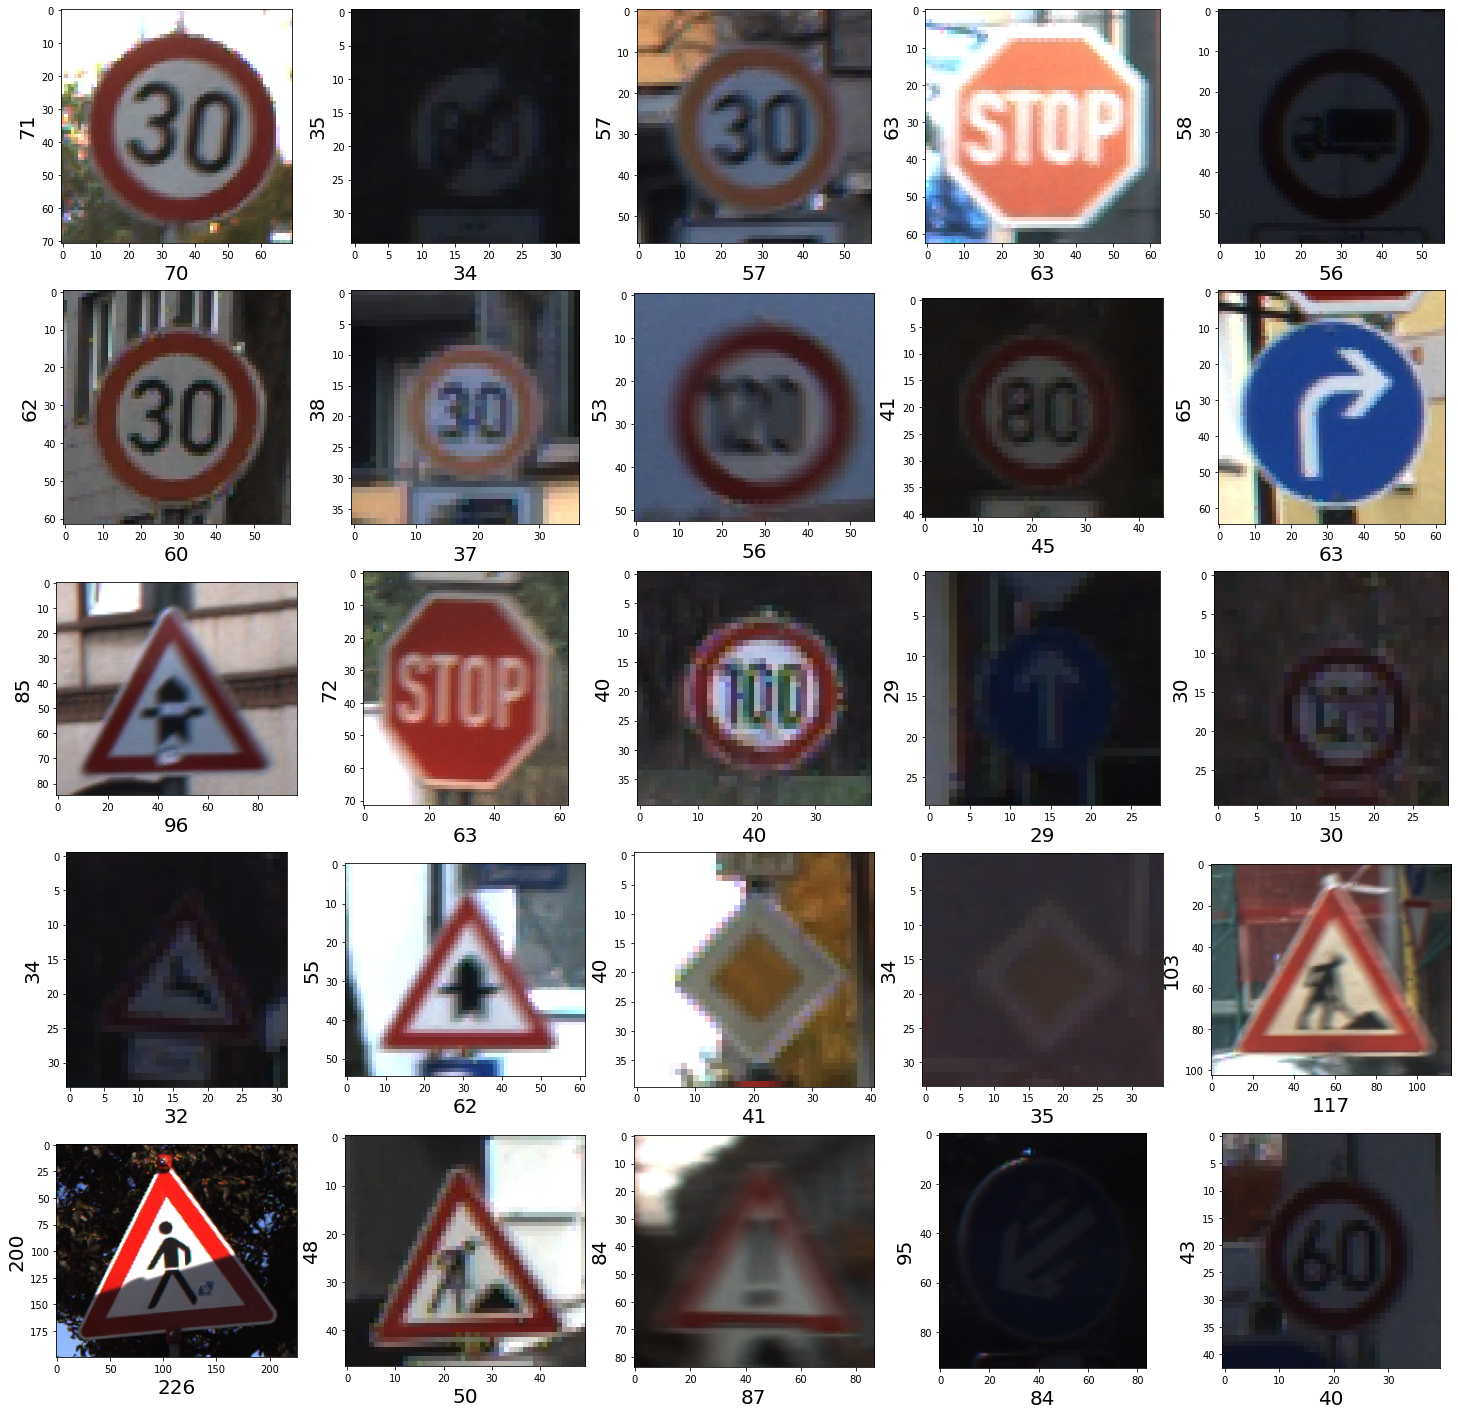

In [ ]:
images_path = os.listdir(test_path)

plt.figure(figsize=(25,25))


for i in range(1,26):
    
    plt.subplot(5,5,i)
    random_img_path = test_path +'/'+ random.choice(images_path)
    rand_img = imread(random_img_path)
    plt.imshow(rand_img)
    plt.xlabel(rand_img.shape[1], fontsize = 20)#width of image
    plt.ylabel(rand_img.shape[0], fontsize = 20)#height of image

In [ ]:
dim1 = []
dim2 = []

for i in range(0,43):
    labels = train_path + '/{0}'.format(i)
    image_path = os.listdir(labels)
    for x in image_path:
        img = imread(labels + '/' + x)
        dim1.append(img.shape[0])
        dim2.append(img.shape[1])

In [ ]:
np.mean(dim1)

50.328929582493814

In [ ]:
np.mean(dim2)

50.83587951745773

In [ ]:
image_shape = (50,50)

In [ ]:
images = []
label_id = []

for i in range(43):
    labels = train_path + '/{0}'.format(i)
    image_path = os.listdir(labels)
    for x in image_path:
        img = Image.open(labels + '/' + x)
        img = img.resize(image_shape)
        img = np.array(img)
        images.append(img)
        label_id.append(i)

In [ ]:
#Converting images into numpy array
images = np.array(images)
#The pixel value of each image ranges between 0 and 255
#Dividing each image by 255 will scale the values between 0 and 1. This is also known as normalization.
images = images/255 

In [ ]:
label_id = np.array(label_id)
label_id.shape

(39209,)

In [ ]:
#Saving the scaled images and labels for future use
np.save('Training_set', images)
np.save('Label_Id', label_id)

In [ ]:
images = np.load('Training_set.npy')
label_id = np.load('Label_Id.npy')

In [ ]:
x_train, x_val, y_train, y_val = train_test_split(images, label_id , test_size = 0.2, random_state = 42)

In [ ]:
y_train_cat = to_categorical(y_train)
y_val_cat = to_categorical(y_val)

In [ ]:
model = Sequential()

#1st layer
model.add(Conv2D(filters = 64, kernel_size = (3,3), input_shape = x_train.shape[1:], activation = 'relu', padding = 'same'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.5))

#2nd layer
model.add(Conv2D(filters = 64, kernel_size = (3,3), activation = 'relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.5))

#3rd layer
model.add(Conv2D(filters = 64, kernel_size = (3,3), activation = 'relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.5))

model.add(Flatten())

#Dense layer
model.add(Dense(128, activation = 'relu'))
model.add(Dropout(0.5))

#Output layer
model.add(Dense(43, activation = 'softmax'))

In [ ]:
model.compile(loss = 'sparse_categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 50, 50, 64)        1792      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 25, 25, 64)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 25, 25, 64)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 23, 23, 64)        36928     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 11, 11, 64)       0         
 2D)                                                             
                                                                 
 dropout_1 (Dropout)         (None, 11, 11, 64)        0

In [ ]:
early_stopping = tf.keras.callbacks.EarlyStopping(monitor = 'val_loss', patience = 2)

model.fit(
    
    x_train, y_train,
    epochs = 17,
    batch_size = 64,
    validation_data = (x_val, y_val),
    callbacks = [early_stopping],
    verbose = 1

)

Epoch 1/17
491/491 [==============================] - 60s 121ms/step - loss: 2.7956 - accuracy: 0.2225 - val_loss: 1.6903 - val_accuracy: 0.4417
Epoch 2/17
491/491 [==============================] - 59s 119ms/step - loss: 1.5106 - accuracy: 0.5071 - val_loss: 0.8164 - val_accuracy: 0.7700
Epoch 3/17
491/491 [==============================] - 59s 120ms/step - loss: 0.9467 - accuracy: 0.6832 - val_loss: 0.4210 - val_accuracy: 0.8826
Epoch 4/17
491/491 [==============================] - 58s 118ms/step - loss: 0.6788 - accuracy: 0.7740 - val_loss: 0.2729 - val_accuracy: 0.9397
Epoch 5/17
491/491 [==============================] - 58s 117ms/step - loss: 0.5286 - accuracy: 0.8222 - val_loss: 0.1868 - val_accuracy: 0.9579
Epoch 6/17
491/491 [==============================] - 57s 116ms/step - loss: 0.4379 - accuracy: 0.8550 - val_loss: 0.1252 - val_accuracy: 0.9742
Epoch 7/17
491/491 [==============================] - 57s 117ms/step - loss: 0.3833 - accuracy: 0.8720 - val_loss: 0.1135 - val_ac

In [ ]:
#Saving the model
model.save(dir_path + 'ModelDAv.h5')

In [ ]:
from tensorflow.keras.models import load_model

model = load_model(dir_path + 'ModelDAv.h5')

In [ ]:
history_dict = model.history
print(history_dict.keys())

AttributeError: 'History' object has no attribute 'keys'

In [ ]:
classes = ['Speed limit (20km/h)',
'Speed limit (30km/h)',
'Speed limit (50km/h)',
'Speed limit (60km/h)',
'Speed limit (70km/h)',
'Speed limit (80km/h)',
'End of speed limit (80km/h)',
'Speed limit (100km/h)',
'Speed limit (120km/h)',
'No passing',
'No passing for vechiles over 3.5 metric tons',
'Right-of-way at the next intersection',
'Priority road',
'Yield',
'Stop',
'No vechiles',
'Vechiles over 3.5 metric tons prohibited',
'No entry',
'General caution',
'Dangerous curve to the left',
'Dangerous curve to the right',
'Double curve',
'Bumpy road',
'Slippery road',
'Road narrows on the right',
'Road work',
'Traffic signals',
'Pedestrians',
'Children crossing',
'Bicycles crossing',
'Beware of ice/snow',
'Wild animals crossing',
'End of all speed and passing limits',
'Turn right ahead',
'Turn left ahead',
'Ahead only',
'Go straight or right',
'Go straight or left',
'Keep right',
'Keep left',
'Roundabout mandatory',
'End of no passing',
'End of no passing by vechiles over 3.5 metric tons']

1/1 [==============================] - 0s 12ms/step


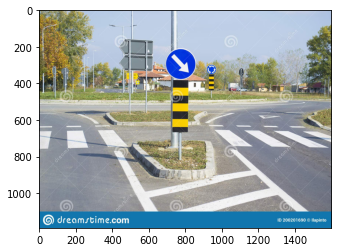

In [ ]:
from PIL import Image

image_shape = (50,50)
img = Image.open(dir_path + 'to.jpg').convert('RGB')
plt.imshow(img)
img = img.resize(image_shape)
img = np.expand_dims(img, axis=0)
img = np.array(img)

predictions = model.predict(img)

In [ ]:
predictions[0]

array([0.0000000e+00, 3.4134057e-16, 3.5130017e-06, 0.0000000e+00,
       0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
       0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
       0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
       0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
       0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
       0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
       0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
       0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
       0.0000000e+00, 6.9147877e-31, 0.0000000e+00, 0.0000000e+00,
       9.9999654e-01, 0.0000000e+00, 0.0000000e+00], dtype=float32)

In [ ]:
sing = (np.argmax(predictions, axis = 1))
placa = classes[int(sing)]
placa

'Roundabout mandatory'